# A Taste of Machine Learning

How do you know if a wine is good or bad? A sommelier might tell you that the chemical properties of wine affect the taste and the quality of the wine, but what if we could test this using machine learning?

<div align="center">
<img width="1200" title="Wine photo" src="images/apolo-photographer-bWAHfy-lQVA-unsplash.jpg"/>
</div>

**Please note**: This exercise is based on a Jupyter notebook (an interactive environment for writing and running code) and is running in Python. To get familiar with working in Jupyter notebooks, see our 2-minute [JupyterLab Tutorial](https://www.university4industry.com/player/chapter/jupyterlab-tutorial).

<div class="alert alert-block alert-info">A cell like this indicates a question you need to answer in the Answers.txt file. Please answer the question <b>before</b> continuing through the notebook. You can <b>double click on Answers.txt</b> in the Left Sidebar now to open it in a new tab. As you go through the notebook, navigate between the tabs to answer questions.
</div>

## Table of contents

1. [Introduction](#1.-Introduction)

2. [Get familiar with the data](#2.-Get-familiar-with-the-data)

3. [Explore the data](#3.-Explore-the-data)

4. [Clean & prepare the data](#4.-Clean-&-prepare-the-data)
   
5. [Train & evaluate a model](#5.-Train-&-evaluate-a-model)

## 1. Introduction

[[ go back to the top ]](#Table-of-contents)

In this challenge, we will build a predictive model that can determine the quality of a wine. We will use a real data set of 1599 red Vinho Verde wine samples from the northern Portugal (Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality)), which includes a number of variables from tests, and a variable `Quality`, which is a score from 1-10 given by experts. Our hypothesis is that chemical properties contribute to wine quality and therefore make a wine "poor", "average", or "excellent". 

To do so we will first explore our data set and create some visualizations to gather some insights about which varaibles might contribite to wine quality. We will then create a model using a part of the data set and evaluate it to determine how effective the model would be at predciting wine qulaity when given previously unseen wines. 

By the end of this tutorial, you will get a basic understanding of how to analyze a large data set and extract some insights from it. You will also learn how important the quality of the training data is for the predictive power of the machine learning model.

## 2. Get familiar with the data

[[ go back to the top ]](#Table-of-contents)

Before we start exploring, we need to import some libraries that will help us with our analyses and visualizations. 

*Remember to press ***Shift+Enter*** to run each code cell.*

In [66]:
# Import data analysis libraries
import pandas as pd
import numpy as np
import random as rnd

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Linear regression and confusion matrix
import sklearn as sk
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# Note: this cell and some of the cells below produce no visible output
# The sucessful execution of a code cell is indicated by the number in the brackets [ ] on the left

Now, let's import our data set `winequality-red.csv` and take a look at it:

In [67]:
# Load data from file into a new object called "wine_data"
wine_data = pd.read_csv('winequality-red.csv', sep=';')

# Show first 10 rows of data set
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Our data set includes 11 variables (the potential predictors of wine quality):
- <b>Fixed acidity:</b> non-volatile acids that do not evaporate readily 
- <b>Volatile acidity:</b> acetic acid in wine which, in large quantities, leads to an unpleasant vinegar taste
- <b>Citric acid:</b> acts as a preservative to increase acidity; in small quantities, adds freshness and flavor to wines
- <b>Residual sugar:</b> the amount of sugar remaining after fermentation stops; the key is to have a perfect balance between sweetness and sourness
- <b>Chlorides:</b> the amount of salt 
- <b>Free sulfur dioxide:</b> prevents microbial growth and the oxidation 
- <b>Total sulfur dioxide:</b> amount of SO2
- <b>Density:</b> sweeter wines have a higher density
- <b>pH:</b> the level of acidity on a scale of 0–14; most wines are between 3–4
- <b>Sulfates:</b> an additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
- <b>Alcohol:</b> the fun part

There is also one variable based on sensory data (the target variable/what we want to predict):
- <b>Quality</b> (score from 1 to 10 given by experts)

Source: [Red Wine Quality Prediction using Classification and Regression Model (Medium)](https://medium.com/dev-genius/red-wine-quality-prediction-using-classification-and-regression-model-f19337821b71)


## 3. Further explore the data

[[ go back to the top ]](#Table-of-contents)

**Data visualization** can be a powerful tool that allows us to see trends and patterns and relationships between variables because our brains are very good at spotting patterns on pictures.

As our target variable, or the variable we want to predict with our model, is the quality of the wines, let's start by visualizing how the `quality` score is distributed in the data set. 

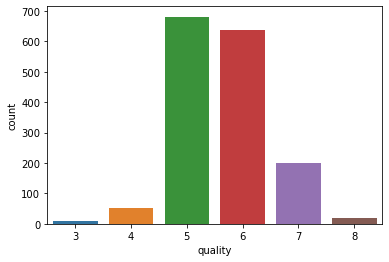

In [68]:
# Create histogram of the target variable (Quality)
sns.countplot(x='quality', data=wine_data)
plt.show()

<div class="alert alert-block alert-info">Pause! Answer <b>Question 1</b> in the Answers.txt file. 
    
Which 2 wine qualities are most common in our data set? Do you foresee any problems that might occur because of which wine qualities are most common?</div>

We can also create a heat map to visualize which variables correlate with each other.

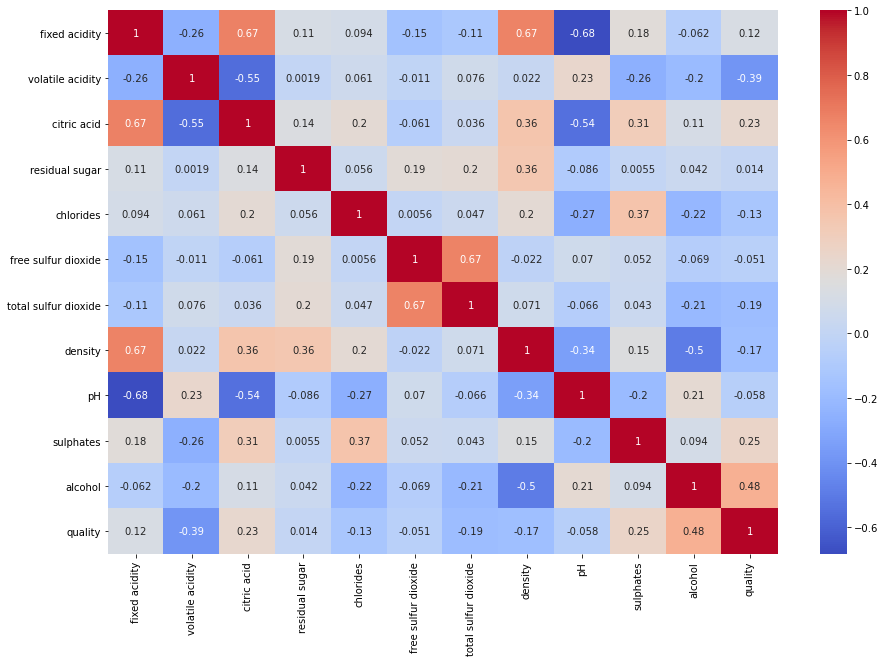

In [69]:
plt.subplots(figsize=(15, 10))
sns.heatmap(wine_data.corr(), annot = True, cmap = "coolwarm")
plt.show()

The correlation coefficient ranges from –1 to 1. When it is closer to 1, there is a strong positive correlation (e.g., `quality` goes up when `alcohol` goes up). When the coefficient is closer to –1, there is a strong negative correlation (e.g, you can see a small negative correlation between the `volatile acidity` and `quality`). Finally, coefficients close to zero mean that there is no correlation.

There are a lot of numbers in this heat map so let's look a little closer at two specific variables: `pH` and `fixed acidity`.

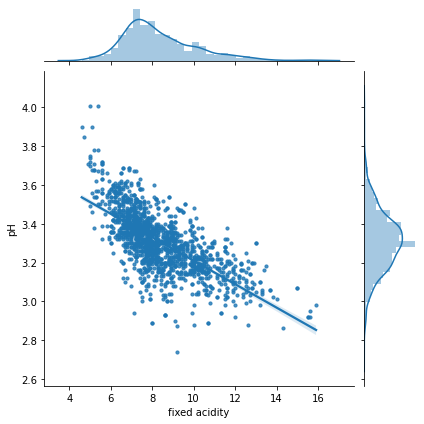

In [70]:
#Visualize the correlation between pH and fixed acidity

#Create a new dataframe containing only pH and fixed acidity columns 
fixedAcidity_pH = wine_data[['pH', 'fixed acidity']]

#Set up plotting grid for the following plot
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, size=6)

#Draw a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draw a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

This scatter plot shows that, as fixed acidity levels increase, pH levels drop. Makes sense doesn’t it? A lower pH level is an indicator of higher acidity.

Let's try another pair: alcohol and quality. Since `quality` is a discrete score, we can use a bar graph to visualize this.

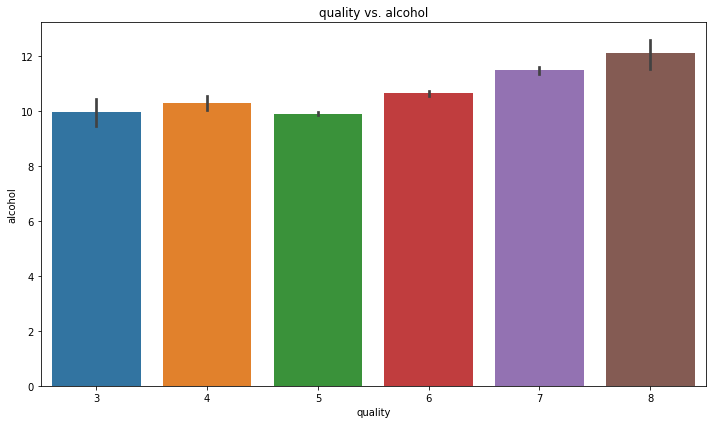

In [71]:
#Visualize the correlation between alcohol and quality

#Create a new dataframe containing only alcohol and quality columns 
alcohol_quality = wine_data[['alcohol', 'quality']]

#Create bar graph
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=alcohol_quality, ax=axs)
plt.title('quality vs. alcohol')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">Pause! Answer <b>Question 2</b> in the Answers.txt file. 
    
Describe the relationship between the variables quality and alcohol in 1 sentence. Does this surprise you? Why or why not?</div>

## 4. Clean & prepare the data

[[ go back to the top ]](#Table-of-contents)

Cleaning a data set before using it to build a machine learning model is an important step in the data analysis pipeline. Errors or missing values in raw data can skew the model and lead to misleading results, and removing irrelevant data can speed up the analysis and improve the outcome.

There are several steps that can be taken to clean and prepare a data set:
- Identifying and correcting mistakes or errors in the data
- Dealing with missing data
- Identifying variables that are most relevant to the task and removing irrelevant ones
- Converting text labels into numbers
- Combining several variables into a new, more descriptive variable

Let's check our data set for missing values.

In [72]:
# Show descriptive statistics of data set
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Since the count for each variable is 1599, there are no missing values in our data set. 

Next, let's consider whether our data set is organized in a way that allows us to answer our original question: Is a wine of poor, average, or excellent quality? At the moment, our data set has the variable `quality` which is a rating of the wine quality from 1 to 10. Since we want to classify wines into 1 of 3 categories, we can adapt our data set to reflect this:

<b>Poor</b>: all wines rated 4 or lower\
<b>Average</b>: wines rated 5 and 6\
<b>Excellent</b>: wines rated 7 or higher

We can represent these 3 categories by numbers 1 (Poor), 2 (Average), and 3 (Excellent) in a new variable called `review`. 

In [73]:
# Convert `quality` into new variable `review`
review = []
for i in wine_data['quality']:
    if i >= 1 and i <= 3:
        review.append('1')
    elif i >= 4 and i <= 7:
        review.append('2')
    elif i >= 8 and i <= 10:
        review.append('3')
wine_data['review'] = review

In [74]:
#Show first 5 rows of data set with 'review' variable added
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


## 5. Train & evaluate a model

[[ go back to the top ]](#Table-of-contents)

Before we train and test our model we need to split our data set into two groups: 

- A **training set** to train our model on (typically 80% of the data).
- A **test set** (mutually exclusive from the training set) to validate our model on unseen data (typically 20% of the data).

During training, the algorithm looks for patterns in the *training set* that link the variables to `review`. Following training, the model is used to predict the wine review from the *test set*.

<div align="center">
<img width="1200" title="SPLIT DATA" src="images/train_test_split.png"/>
</div>

In [75]:
#Define review variable as dependent variable (y) and all other variables as independent variables (x)
y = wine_data.review
x = wine_data.drop('review', axis=1)
x = wine_data.drop('quality', axis=1)
#Split data into training and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

There are a number of models that we can use. Since we have want to solve a classification problem (Is a wine poor, average, or excellent?), we can use the logistic regression algorithm. 

In [76]:
# Fit training data to model 
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_acc_score = lr.score(x_test, y_test)

# Evaluate model on test data
lr_predict = lr.predict(x_test)

# Print accuracy score 
print(lr_acc_score*100)

99.5


<div class="alert alert-block alert-info">Pause! Answer <b>Question 3</b> in the Answers.txt file. 
    
The accuracy score is very high. How do you think does this score reflects the performance of our model?

Now, let's assess the performance of our model by using a different approach.

A confusion matrix is a performance measurement for a machine learning classifier. It is a table or matrix that summarizes the number of correct and incorrect predictions, organized by the different combinations of predicted and actual values.

<div align="left">
<img width="400" title="Confusion matrix" src="images/Confusion matrix.png"/>
</div>

In our example the confusion matrix will be used to compare the predicted (wine review) values by the model with the actual (wine review) values. If you're interested in learning more, see [here](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62).

In [ ]:
#Create heatmap confusion matrix
ax = plt.subplot()
cm= confusion_matrix(y_test,lr_predict)
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt='g');

# Set labels, title, and ticks
ax.set_xlabel('Predicted review');ax.set_ylabel('True review'); 
ax.xaxis.set_ticklabels(['Poor', 'Average', 'Excellent']); ax.yaxis.set_ticklabels(['Excellent', 'Average', 'Poor']);

The confusion matrix indicates that our model is very good at identifying average wines, but terrible at identifying poor or excellent wines. In practice, this means our model is not very useful. But why did this happen? If you recall the histogram we created earlier, the majority of the wines in the data set were rated as 5 or 6 in quality. Let's see a histogram of the variable `review` which directly corresponds to what we want our model to predict.

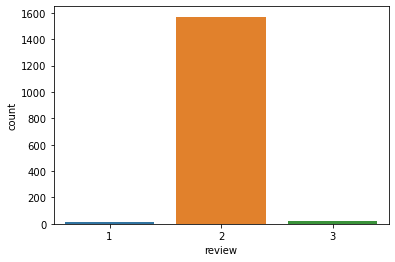

In [79]:
# Create histogram of the target variable (Review)
sns.countplot(x='review', data=wine_data)
plt.show()

Now we can clearly see why our model is so bad at giving meaningful predictions. There were simply not enough wines labelled as poor or excellent for the model to "learn" how to identify them. 

This tells us two very important lessons about building a machine learning model:
1. The data used to train a model must reflect the question you are trying to answer
2. Simply having a large data set does not mean does not mean the model will perform well

In our case, we had a relatively large but unbalanced data set, in which the majority of data points were in one class (Average), so we were unable to build a good model. 

<div class="alert alert-block alert-info">Pause! Answer <b>Question 4</b> in the Answers.txt file. 
    
What measures would you take to improve the outcome or performance of the wine classifier model?

#### Congratulations! You have completed A Taste of Machine Learning! 

#### Remember to save the Answers.txt file (via File > Save File) before you close the tutorial by clicking on the "Submit" button.